# Step [1]: Prepare libraries and data

## [1.1] Include important libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from operator import itemgetter
import arabic_reshaper
import re
import json
import requests
from ar_corrector.corrector import Corrector
import qalsadi.lemmatizer

## [1.2] Download data

In [ ]:
# !wget 'https://drive.google.com/uc?export=download&id=1KepfzAhJ7dloG8XaWQf0ovQipDHYS8aI' -O 'final_data.zip'

In [ ]:
# !unzip final_data.zip

## [1.3] read data from csv file

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
valid = pd.read_csv('valid.csv')
train.head()

,tweet,label
0,#تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمره...,2
1,'#خذ_الخطوة_خذ_اللقاح \nالحمدالله من قبل ومن ب...,1
2,لو اللي مثلك وشرواك طعمو كان قد حذفنا الكمامات...,1
3,#الصحة:•نحو 14.5 مليون شخص تم إعطاؤهم جرعة لقا...,1
4,• في منظور القوة البشرية ( الأزمة ستطول لأشهر ...,3


# Step [2]: Text Analysis

## [2.1] Tweets per class

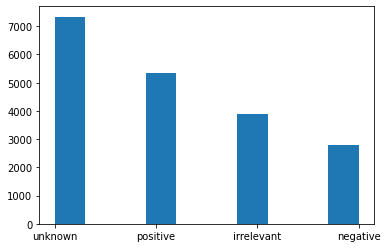

3    7338
1    5334
2    3902
0    2783
Name: label, dtype: int64

In [3]:
# count = train['label'].value_counts()
# plt.hist(weights=count, x=['unknown','positive', 'irrelevant','negative'])
# plt.show()
# count

## [2.2] Finding collocations (n-grams)

In [4]:
def find_bigrams(tweet, work = 1):
    """find collocations in tweet function.
    Input:
        tweet: a string containing a tweet
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        bigrams

    """
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = nltk.collocations.BigramCollocationFinder.from_words(tweet)
    finder.apply_freq_filter(10)
    # return the 10 n-grams with the highest PMI
    collocations = finder.nbest(bigram_measures.raw_freq, 10)
#     for i in finder.score_ngrams(bigram_measures.pmi):
#         print (i)
    return collocations

In [5]:
def find_trigrams(tweet, work = 1):
    """find collocations in tweet function.
    Input:
        tweet: a string containing a tweet
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        trigrams

    """
    trigramm_measures = nltk.collocations.TrigramAssocMeasures()
    finder = nltk.collocations.TrigramCollocationFinder.from_words(tweet)
    finder.apply_freq_filter(10)
    # return the 10 n-grams with the highest PMI
    collocations = finder.nbest(trigramm_measures.raw_freq, 10)
#     for i in finder.score_ngrams(trigramm_measures.pmi):
#         print (i)
    return collocations

In [6]:
def find_quadgrams(tweet, work = 1):
    """find collocations in tweet function.
    Input:
        tweet: a string containing a tweet
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        quadgrams

    """
    quadgram_measures = nltk.collocations.QuadgramAssocMeasures()
    finder = nltk.collocations.QuadgramCollocationFinder.from_words(tweet)
    finder.apply_freq_filter(10)
    # return the 10 n-grams with the highest PMI
    collocations = finder.nbest(quadgram_measures.raw_freq, 10)
#     for i in finder.score_ngrams(trigramm_measures.pmi):
#         print (i)
    return collocations

In [7]:
# words = str(train.tweet.values.tolist()).split(' ')
# co = find_bigrams(words)
# print(co)
# co = find_trigrams(words)
# print(co)
# co = find_quadgrams(words)
# print(co)

[('', ''), ('لقاح', 'كورونا'), ('من', 'لقاح'), ('فيروس', 'كورونا'), ('على', 'لقاح'), ('لقاح', 'فيروس'), ('لقاح', '#كورونا'), ('كورونا', 'في'), ('وزارة', 'الصحة'), ('ضد', 'فيروس')]
[('', '', ''), ('من', 'لقاح', 'كورونا'), ('لقاح', 'فيروس', 'كورونا'), ('جرعة', 'من', 'لقاح'), ('ضد', 'فيروس', 'كورونا'), ('', '', "',"), ('الجرعة', 'الثانية', 'من'), ('الجرعة', 'الأولى', 'من'), ('لقاح', 'كورونا', 'في'), ('الأولى', 'من', 'لقاح')]
[('', '', '', ''), ('', '', '', "',"), ('الجرعة', 'الأولى', 'من', 'لقاح'), ('الجرعة', 'الثانية', 'من', 'لقاح'), ('لقاح', 'ضد', 'فيروس', 'كورونا'), ('مليون', 'جرعة', 'من', 'لقاح'), ('الثانية', 'من', 'لقاح', 'كورونا'), ('الأولى', 'من', 'لقاح', 'كورونا'), ('من', 'لقاح', 'فيروس', 'كورونا'), ('-', 'عبر', 'تطبيق', 'نبض')]


## [2.3] Finding collocations (n-grams) for each label


In [8]:
# words_0 = str(train[train.label == 0].tweet.values.tolist()).split(' ')
# co = find_bigrams(words_0)
# print(co)
# co = find_trigrams(words_0)
# print(co)
# co = find_quadgrams(words_0)
# print(co)

[('لقاح', 'كورونا'), ('', ''), ('من', 'لقاح'), ('فيروس', 'كورونا'), ('من', 'كورونا'), ('من', 'اللقاح'), ('على', 'لقاح'), ('لقاح', '#كورونا'), ('', "',"), ('اخذ', 'لقاح')]
[('', '', ''), ('من', 'لقاح', 'كورونا'), ('ضد', 'فيروس', 'كورونا'), ('', '', "',"), ('لقاح', 'فيروس', 'كورونا'), ('الله', 'ونعم', 'الوكيل'), ('على', 'لقاح', 'كورونا'), ('منظمة', 'الصحة', 'العالمية'), ('حسبنا', 'الله', 'ونعم'), ('بعد', 'تلقي', 'لقاح')]
[('', '', '', ''), ('', '', '', "',"), ('لقاح', 'ضد', 'فيروس', 'كورونا')]


In [9]:
# words_1 = str(train[train.label == 1].tweet.values.tolist()).split(' ')
# co = find_bigrams(words_1)
# print(co)
# co = find_trigrams(words_1)
# print(co)
# co = find_quadgrams(words_1)
# print(co)

[('لقاح', 'كورونا'), ('', ''), ('من', 'لقاح'), ('فيروس', 'كورونا'), ('لقاح', 'فيروس'), ('على', 'لقاح'), ('لقاح', '#كورونا'), ('ضد', 'فيروس'), ('الجرعة', 'الأولى'), ('الجرعة', 'الثانية')]
[('', '', ''), ('من', 'لقاح', 'كورونا'), ('الجرعة', 'الأولى', 'من'), ('لقاح', 'فيروس', 'كورونا'), ('الأولى', 'من', 'لقاح'), ('ضد', 'فيروس', 'كورونا'), ('جرعة', 'من', 'لقاح'), ('الجرعة', 'الثانية', 'من'), ('الثانية', 'من', 'لقاح'), ('جرعتين', 'من', 'لقاح')]
[('', '', '', ''), ('الجرعة', 'الأولى', 'من', 'لقاح'), ('الجرعة', 'الثانية', 'من', 'لقاح'), ('الأولى', 'من', 'لقاح', 'كورونا'), ('على', 'جرعتين', 'من', 'لقاح'), ('الثانية', 'من', 'لقاح', 'كورونا'), ('من', 'لقاح', 'فيروس', 'كورونا'), ('', '', '', "',"), ('جرعتين', 'من', 'لقاح', 'كورونا'), ('لقاح', 'ضد', 'فيروس', 'كورونا')]


In [10]:
# words_2 = str(train[train.label == 2].tweet.values.tolist()).split(' ')
# co = find_bigrams(words_2)
# print(co)
# co = find_trigrams(words_2)
# print(co)
# co = find_quadgrams(words_2)
# print(co)

[('', ''), ('لقاح', 'كورونا'), ('فيروس', 'كورونا'), ('بفيروس', 'كورونا'), ('فايروس', 'كورونا'), ('وزارة', 'الصحة'), ('جائحة', 'كورونا'), ('إصابة', 'جديدة'), ('جديدة', 'بفيروس'), ('كورونا', 'في')]
[('', '', ''), ('جديدة', 'بفيروس', 'كورونا'), ('إصابة', 'جديدة', 'بفيروس'), ('من', 'فيروس', 'كورونا'), ('منظمة', 'الصحة', 'العالمية'), ('فيروس', 'كورونا', 'الجديد'), ('دواء', 'قادر', 'على'), ('قادر', 'على', 'وقف'), ('على', 'وقف', 'عدوى'), ('من', 'لقاح', 'كورونا')]
[('', '', '', ''), ('إصابة', 'جديدة', 'بفيروس', 'كورونا'), ('دواء', 'قادر', 'على', 'وقف'), ('قادر', 'على', 'وقف', 'عدوى'), ('عن', 'دواء', 'قادر', 'على'), ('تعلن', 'عن', 'دواء', 'قادر'), ('حالة', 'إيجابية', 'جديدة', 'بفيروس'), ('بين', 'سكان', 'أصبحوا', 'أكثر'), ('تصبح', 'أقل', 'ضراوة', 'بمرور'), ('على', 'وقف', 'عدوى', 'كورونا')]


In [11]:
# words_3 = str(train[train.label == 3].tweet.values.tolist()).split(' ')
# co = find_bigrams(words_3)
# print(co)
# co = find_trigrams(words_3)
# print(co)
# co = find_quadgrams(words_3)
# print(co)

[('', ''), ('لقاح', 'كورونا'), ('من', 'لقاح'), ('فيروس', 'كورونا'), ('على', 'لقاح'), ('لقاح', '#كورونا'), ('لقاح', 'فيروس'), ('كورونا', 'في'), ('', "',"), ('جرعة', 'من')]
[('', '', ''), ('من', 'لقاح', 'كورونا'), ('لقاح', 'فيروس', 'كورونا'), ('', '', "',"), ('جرعة', 'من', 'لقاح'), ('لقاح', 'كورونا', 'في'), ('على', 'لقاح', 'كورونا'), ('ضد', 'فيروس', 'كورونا'), ('الجرعة', 'الثانية', 'من'), ('الثانية', 'من', 'لقاح')]
[('', '', '', ''), ('', '', '', "',"), ('الجرعة', 'الثانية', 'من', 'لقاح'), ('مليون', 'جرعة', 'من', 'لقاح'), ('بالتسجيل', 'لأخذ', 'لقاح', 'فيروس'), ('الثانية', 'من', 'لقاح', 'كورونا'), ('اضافة', 'ثلاث', 'مراكز', 'صحية'), ('ثلاث', 'مراكز', 'صحية', 'لحملة'), ('الجرعة', 'الأولى', 'من', 'لقاح'), ('فضلا', 'التواصل', 'مع', 'وزارة')]


## [2.4] Histogram for tweet length

In [12]:
# wx = {}
# i=0
# for t in train.tweet.values.tolist() :
#     if len(str(t)) in wx:
#         wx[len(str(t))] += 1
#     else:
#         wx[len(str(t))] = 1

In [13]:
# w = [] 
# x = [] 
# for k in wx:
#     x.append(k)
#     w.append(wx[k])

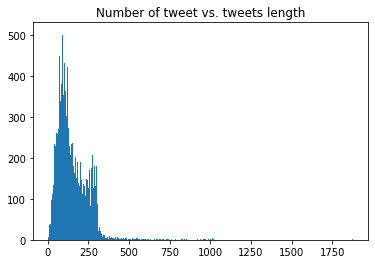

In [14]:
# plt.hist(x=x, weights=w, bins = int(len(x)))
# plt.title('Number of tweet vs. tweets length')
# plt.xlabel='Number of tweets'
# plt.ylabel='tweets length'
# plt.show()

## [2.5] Trending hashtags

In [15]:
def trending_hashtags(words, maxN, work=1):
    """Process tweet function.
    Input:
        words: words of the tweets
        maxN: max number of trending hashtags returned
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        trending hashtags

    """
    hashtags = {}
    for word in words:
        if word in hashtags and word and word[0] == '#':
            hashtags[word] += 1
        else:
            hashtags[word] = 1
    trend = dict(sorted(hashtags.items(), key = itemgetter(1), reverse = True)[:maxN])
    
    w = [] 
    x = [] 
    for k in trend:
        x.append(k)
        w.append(trend[k])
    
    plt.hist(x=x, weights=w, bins = int(len(x)))
    plt.title('Number of tweet vs. tweets length')
    plt.xticks(rotation=90)
    plt.show()
    
    return trend

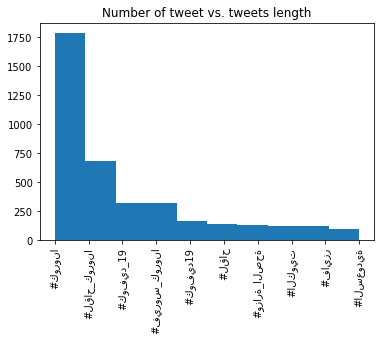

{'#كورونا': 1787,
 '#لقاح_كورونا': 678,
 '#كوفيد_19': 324,
 '#فيروس_كورونا': 324,
 '#كوفيد19': 162,
 '#لقاح': 142,
 '#وزارة_الصحة': 131,
 '#الكويت': 123,
 '#فايزر': 121,
 '#السعودية': 98}

In [16]:
# trending_hashtags(words, 10)

## [2.6] Trending hashtags for each label

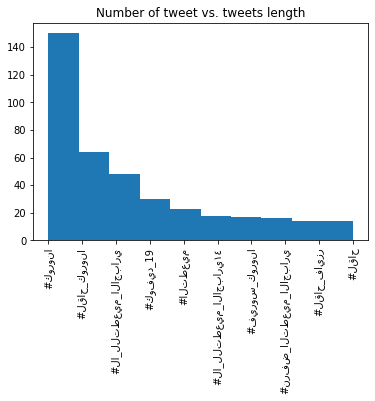

{'#كورونا': 150,
 '#لقاح_كورونا': 64,
 '#لا_للتطعيم_الاجباري': 48,
 '#كوفيد_19': 30,
 '#التطعيم': 23,
 '#لا_للتطعيم_الاجباري١٤': 18,
 '#فيروس_كورونا': 17,
 '#نرفض_التطعيم_الاجباري': 16,
 '#لقاح_فايزر': 14,
 '#لقاح': 14}

In [17]:
# trending_hashtags(words_0, 10)

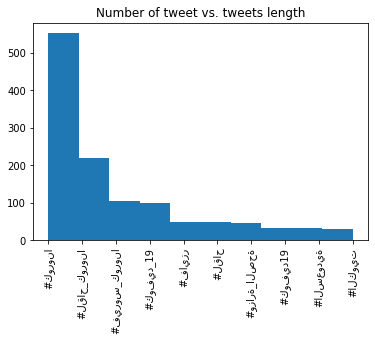

{'#كورونا': 553,
 '#لقاح_كورونا': 219,
 '#فيروس_كورونا': 103,
 '#كوفيد_19': 99,
 '#فايزر': 48,
 '#لقاح': 47,
 '#وزارة_الصحة': 45,
 '#كوفيد19': 32,
 '#السعودية': 31,
 '#الكويت': 29}

In [18]:
# trending_hashtags(words_1, 10)

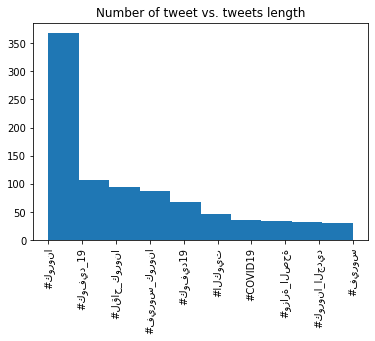

{'#كورونا': 368,
 '#كوفيد_19': 106,
 '#لقاح_كورونا': 95,
 '#فيروس_كورونا': 87,
 '#كوفيد19': 68,
 '#الكويت': 46,
 '#COVID19': 35,
 '#وزارة_الصحة': 33,
 '#كورونا_الجديد': 32,
 '#فيروس': 30}

In [19]:
# trending_hashtags(words_2, 10)

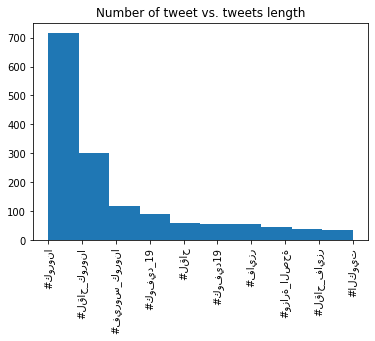

{'#كورونا': 716,
 '#لقاح_كورونا': 300,
 '#فيروس_كورونا': 117,
 '#كوفيد_19': 89,
 '#لقاح': 60,
 '#كوفيد19': 56,
 '#فايزر': 54,
 '#وزارة_الصحة': 44,
 '#لقاح_فايزر': 39,
 '#الكويت': 36}

In [20]:
# trending_hashtags(words_3, 10)

## [3.1] Remove URLs & mentions

# اولا نحذف الأسطر التي تحوي قيم فارغة

In [3]:
tweets = []
for t in train.tweet.values:
    if isinstance(t, str):
        tweets.append(t)

In [4]:
def remove_urls(tweets, work=1):
    """Process tweet function.
    Input:
        tweets: list of tweets
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        cleaned_tweets: tweet after removing urls

    """
    if work == 0:
        return tweets
    cleaned_tweets = []
    for t in tweets:
        cleaned_tweets.append(re.sub(r"http\S+", " ",t))
    return cleaned_tweets

In [5]:
def remove_mentions(tweets, work=1):
    """Process tweet function.
    Input:
        tweets: list of tweets
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        cleaned_tweets: tweet after removing mentions

    """
    if work == 0:
        return tweets
    cleaned_tweets = []
    for t in tweets:
        cleaned_tweets.append(re.sub("@([a-zA-Z0-9_]{1,50})", " ",t))
    return cleaned_tweets

In [24]:
tweets_no_urls = remove_urls(tweets)
tweets_no_url_mentions = remove_mentions(tweets_no_urls)
tweets_no_url_mentions[:5]

['#تبني_قطط_انقاذ من الخاص هاااام كيتن أنثى عمرها ٥٩ يوم اخذتها حديثه الولاده عمرها ٣ ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده  وعند اكتمال شهرين يحتاجوا مساحة  وانا ما عندي هادي لوجود اكثر من ٧ قطط حديثه الولاده للتواصل   التبني الرياض ',
 "'#خذ_الخطوة_خذ_اللقاح \\nالحمدالله من قبل ومن بعد أخذت اليوم \\nالجرعه الأولى من لقاح #فيروس_كورونا\\nأسأل الله أن يجعل فيه العافيه وأن يزيل \\nعن هذا الوباء عاجلا غير آجل.  ",
 'لو اللي مثلك وشرواك طعمو كان قد حذفنا الكمامات وارتاحت اذانينا لاننا نلبسها الحين علشانكم انتم ووزارة الصحه خايفه عليكم، حنا بمركب واحد اما ناخذ اللقاح ونوصل لارض اليابسه ولا نستمر في الامواج ( المتحورات)لحد مايرحمنا الله برحمته',
 '#الصحة:•نحو 14.5 مليون شخص تم إعطاؤهم جرعة لقاح #كورونا•اللقاحات آمنة وبإمكان كل من تلقى اللقاح التبرع بالدم•يمكن تلقي جرعات مختلفة من لقاح كورونا',
 '• في منظور القوة البشرية ( الأزمة ستطول لأشهر - كورونا في انتشار - اللقاح يحتاج إلى سنة لاعتماده ) • وفي القدرة الإلهية لطف ورحمة وحكمة قال ربي سبحانه وتعالى: { وما كان

## لا نحذف الهاشتاغات لأنها جزء من محتوى النص تساعد على فهم المعنى 

## [3.2] Remove duplicated characters

In [6]:
def remove_dup_cahrs(tweets, work=1):
    """Process tweet function.
    Input:
        tweets: list of tweets
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        cleaned_tweets: tweet after removing duplicated chars

    """
    if work == 0:
        return tweets
    cleaned_tweets = []
    for t in tweets:
        cleaned_tweets.append(re.sub(r'(.)\1+', r'\1', t))
    return cleaned_tweets

## لتوحيد الكلمات التي تملك نفس المعنى

In [26]:
tweets_no_dup_cahrs = remove_dup_cahrs(tweets_no_url_mentions)

In [27]:
tweets_no_url_mentions[23]

'  سؤال لمن يعرف  لماذا جميع شركات الادوية و المختبرات في العالم قاموا بعمل لقاح كورونا معتمدين عن mRNA و لم تقوم اي شركة او مختبر او باحث باجراء لقاح تقليدي ؟؟!!!'

In [28]:
tweets_no_dup_cahrs[23]

' سؤال لمن يعرف لماذا جميع شركات الادوية و المختبرات في العالم قاموا بعمل لقاح كورونا معتمدين عن mRNA و لم تقوم اي شركة او مختبر او باحث باجراء لقاح تقليدي ؟!'

## [3.3] Unify words

In [7]:
def spell_check(tweets, work=1):
    """Process tweet function.
    Input:
        tweets: list of tweets
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        cleaned_tweets: tweet after spell_check

    """
    if work == 0:
        return tweets
    
    corr = Corrector()
    cleaned_tweets = []
    for tweet in tweets:
        cleaned_tweet = ''
        for word in tweet.split(' '):
            ch = corr.spell_correct(word)
            if ch != True:
                word = ch[0][0]
            cleaned_tweet += word + ' '
        cleaned_tweets.append(cleaned_tweet)
    return cleaned_tweets

## خطوة مفيدة ولكن عملية التصحيح ليست دقيقة وقد تغير المعنى المقصود من النص

In [30]:
spell_check(tweets[:2])

['# من الخاص هااااا كيتا أنثى عمرها في يوم اخذتها حديثه الولاده عمرها و ايام تم التطعيم امس سبب العرض للتبني انا اعتني بالقطط حديثه الولاده و وعند اكتمال شهرين يحتاجوا مساحة و وانا ما عندي هادي لوجود اكثر من و قطط حديثه الولاده للتواصل @ التبني الرياض و ',
 "' الحمدالله من قبل ومن بعد أخذت اليوم الجرعه الأولى من لقاح # الله أن يجعل فيه العافيه وأن يزيل عن هذا الوباء عاجلا غير آجلا h "]

## [3.4] Unify Numbers

In [25]:
def replace_numbers(tweets, work=1):
    """Process tweet function.
    Input:
        tweets: list of tweets
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        cleaned_tweets: tweet after removing duplicated chars

    """
    if work == 0:
        return tweets
    cleaned_tweets = []
    for t in tweets:
        cleaned_tweets.append(re.sub(r"\d+", "NUM", t))
    return cleaned_tweets

تكون الأرقام مهمة في الإحصائيات

يمكن عدم حذف الأرقام في حال كانت نسبة مئوية

In [28]:
tweets_replaced_numbers = replace_numbers(train.tweet.values[9:99])

In [30]:
tweets_replaced_numbers[7]

'@A<NUM>_NajM_<NUM>A @iii<NUM>bi @KsaBankr انا جاني كورونا وطبت ومابي لقاح خطأ تعميم فكره بس عشان شفت عينه وحده..وحنا نتكلم عن مرض نسبة الشفاء <NUM>٪وتجبر الناس تأخذ لقاحه ليش وانا مناعتي قوية وجربت كورونا؟'

In [31]:
tweets_replaced_numbers[7]

'@A<NUM>_NajM_<NUM>A @iii<NUM>bi @KsaBankr انا جاني كورونا وطبت ومابي لقاح خطأ تعميم فكره بس عشان شفت عينه وحده..وحنا نتكلم عن مرض نسبة الشفاء <NUM>٪وتجبر الناس تأخذ لقاحه ليش وانا مناعتي قوية وجربت كورونا؟'

## [3.5] Remove stop words

In [9]:
def remove_stop_words(tweets, work=1):
    """Process tweet function.
    Input:
        tweets: list of tweets
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        cleaned_tweets: tweet after removing stop words

    """
    if work == 0:
        return tweets
    cleaned_tweets = []
    for tweet in tweets:
        tweet_no_stopwords = ''
        for word in tweet.split(' '):
            if not word in nltk.corpus.stopwords.words('arabic'):
                tweet_no_stopwords = tweet_no_stopwords + ' ' + word
        cleaned_tweets.append(tweet_no_stopwords)
    return cleaned_tweets

## حذفها ليس بالأمر الجيد دائما لأنه ممكن أن يتغير المعنى عند حذفها في بعض الحالات

In [10]:
def remove_emojis(tweets, work=1):
    """Process tweet function.
    Input:
        tweets: list of tweets
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        cleaned_tweets: tweet after removing emojis

    """
    if work == 0:
        return tweets
    cleaned_tweets = []
    for tweet in tweets:
        emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
        cleaned_tweets.append(emoji_pattern.sub(r'',tweet ))
    return cleaned_tweets

In [11]:
tweets_no_stopwords = remove_stop_words(tweets_replaced_numbers[:10])

NameError: name 'tweets_replaced_numbers' is not defined

In [12]:
tweets_no_emojis = remove_emojis(tweets_no_stopwords)

NameError: name 'tweets_no_stopwords' is not defined

In [13]:
tweets_replaced_numbers[7]

NameError: name 'tweets_replaced_numbers' is not defined

In [40]:
tweets_no_emojis[7]

' السلطات الصحية تعلن تطعيم نصف مليون طفل الفئة العمرية [<NUM>-<NUM>] بلقاح فيروس كورونا أنحاء البلاد أسبوع بدء تطعيم الفئة '

## [3.6] Keep arabic text

In [57]:
def keep_arabic(tweets, work=1):
    """Process tweet function.
    Input:
        tweets: list of tweets
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        cleaned_tweets: tweet after keeping arabic words and hashtags

    """
    if work == 0:
        return tweets
    cleaned_tweets = []
    pattern = re.compile("([\u0627-\u064a]+) | #\w+")
    for tweet in tweets:
        tweet_ar = ''
        for word in tweet.split(' '):
            if pattern.match(word):
                tweet_ar = tweet_ar + ' ' + word
        cleaned_tweets.append(tweet_ar)
    return cleaned_tweets

## [3.7] Lemmatization

In [33]:
def lemmatize(tweets, work=1):
    """Process tweet function.
    Input:
        tweets: list of tweets
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        cleaned_tweets: tweet after Lemmatization

    """
    if work == 0:
        return tweets
    cleaned_tweets = []
    lemmer = qalsadi.lemmatizer.Lemmatizer()
    for tweet in tweets:
        lemmas = lemmer.lemmatize_text(tweet)
        tweet_lem = ''
        for word in lemmas:
#             if word == 'NUM' or word == '>':
#                 tweet_lem = tweet_lem + word
#             else:
            tweet_lem = tweet_lem + ' ' + word
        cleaned_tweets.append(tweet_lem)
    return cleaned_tweets

In [34]:
tweet_lemmatized = lemmatize(tweets_replaced_numbers[7:8])
# print(tweets_no_emojis[7:8])
tweet_lemmatized

[' @ A < NUM > _NajM_ < NUM > A @ iii < NUM > bi @ KsaBankr انا جان كار طاب ومابي لقاح خطأ تعميم كره بس عش شاف عين وحد .. حن تكلم عن مرض نسب شفاء < NUM >٪ تجبر ناس أخذ لقاح ليش وانا مناع قوى جرب كار ؟']

## [3.8] Normalization

In [82]:
def normalize(tweets, work=1):
    """Process tweet function.
    Input:
        tweets: list of tweets
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        cleaned_tweets: tweet after Normalization

    """
    if work == 0:
        return tweets
    cleaned_tweets = []
    for tweet in tweets:
        for form in  ('أ', 'إ', 'آ',):
            tweet = tweet.replace(form, 'ا')
        
        tweet = tweet.replace('ة', 'ه')
        
        tweet = tweet.replace('ئ', 'ء')
        tweet = tweet.replace('ؤ', 'ء')
        
#         tweet = tweet.replace('ي', 'ى')
        

        cleaned_tweets.append(tweet)
    return cleaned_tweets

In [83]:
norm = normalize(tweets[2463:2464])
print(tweets[2463:2464])
norm

['أهم شيء تتلقحون، أما الدراسة فعساكم ما تعلمتم"أعِنّي عَليَّ فَإنِّي عَدوِّي وأنت عَليمٌ بِكُلِّ الخَفايا"🖤🖤🖤🖤✅ منشأها الهند.. اكتشاف سلالة جديدة مزدوجة من فيروس كورونا']


['اهم شيء تتلقحون، اما الدراسه فعساكم ما تعلمتم"اعِنّي عَليَّ فَانِّي عَدوِّي وانت عَليمٌ بِكُلِّ الخَفايا"🖤🖤🖤🖤✅ منشاها الهند.. اكتشاف سلاله جديده مزدوجه من فيروس كورونا']

# خطوة مهمة لكي لا تكون الداتا Sparse 

#### بحيث لا توجد طريقة موحدة عند كتابة الأحرف المذكورة

#### يمكن أيضا إزالة الحركات والتنوين

## Extra: diacritic removal

In [84]:
def diacritic_removal(tweets, work=1):
    """Process tweet function.
    Input:
        tweets: list of tweets
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        cleaned_tweets: tweet after Normalization

    """
    if work == 0:
        return tweets
    
    DIACRITICS = (
    'َ',  # Fatha
    'ُ',  # Damma
    'ِ',  # Kasra
    'ً',  # Tanween Fath
    'ٌ',  # Tanween Damm
    'ٍ',  # Tanween Kase
    'ْ',  # Sokoon
    'ّ',  # Shadda
    'ـ', # Tatweel
    )
    
    cleaned_tweets = []
    for tweet in tweets:
        for diacritic in DIACRITICS:
            tweet = tweet.replace(diacritic, '')
        cleaned_tweets.append(tweet)
    return cleaned_tweets

In [85]:
t = diacritic_removal(norm)
print(norm)
t

['اهم شيء تتلقحون، اما الدراسه فعساكم ما تعلمتم"اعِنّي عَليَّ فَانِّي عَدوِّي وانت عَليمٌ بِكُلِّ الخَفايا"🖤🖤🖤🖤✅ منشاها الهند.. اكتشاف سلاله جديده مزدوجه من فيروس كورونا']


['اهم شيء تتلقحون، اما الدراسه فعساكم ما تعلمتم"اعني علي فاني عدوي وانت عليم بكل الخفايا"🖤🖤🖤🖤✅ منشاها الهند.. اكتشاف سلاله جديده مزدوجه من فيروس كورونا']

In [86]:
def remove_duplicate_tweets(tweets, work=1):
    """Process tweet function.
    Input:
        tweets: list of tweets
        work: binary value take 1 by default working as on/off for the function, if work=0 the function will return
     the tweet without changing
    Output:
        tweets after removing duplicated tweets

    """
    if work == 0:
        return tweets
    
    return list(set(tweets))

In [87]:
def preprocess(tweet, flags=[1,1,1,1,1,1,1,1,1]):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
        flags: list of "work" values for all functions will called here.
    Output:
        cleaned_tweet: tweet after apply all cleaning and normlizaing functions

    """
    tweet = remove_urls(tweet, flags[0])
    tweet = remove_mentions(tweet, flags[1])
    tweet = remove_dup_cahrs(tweet, flags[2])
    tweet = spell_check(tweet, flags[3])
    tweet = replace_numbers(tweet, flags[4])
    tweet = remove_stop_words(tweet, flags[5])
    tweet = remove_emojis(tweet, flags[6])
    tweet = lemmatize(tweet, flags[7])
    tweet = diacritic_removal(tweet, flags[8])
    tweet = remove_duplicate_tweets(tweet, flags[9])
    ...
    return tweet